

## 템플릿 매칭


### 이해하기


#### 템플릿 매칭(Template matching)

- 입력 영상에서 (작은 크기의) 템플릿 영상과 일치하는 부분을 찾는 기법입니다.

- 템플릿: 찾을 대상이 되는 작은 영상. 패치(patch)입니다.

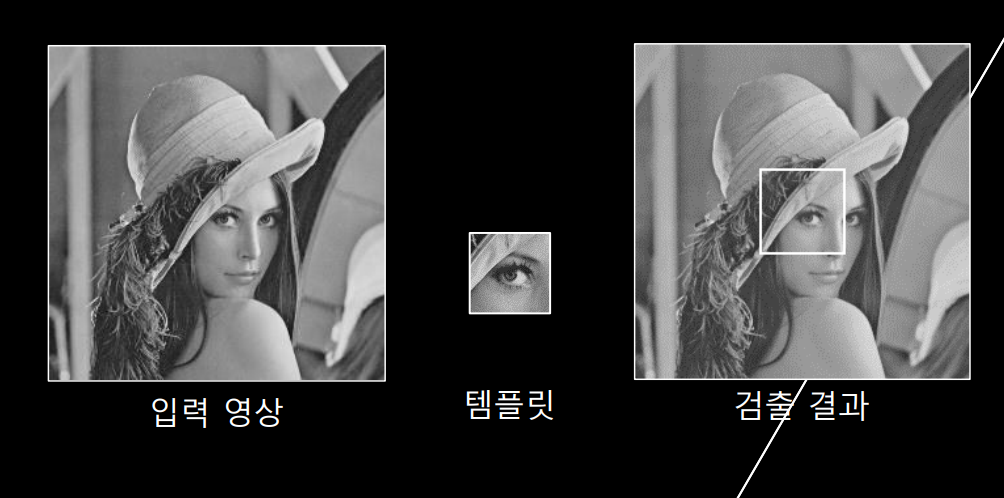

![](https://images.velog.io/images/qsdcfd/post/a3cb33cc-8548-46f1-babc-bade42cff0c7/image.png)


#### 템플릿매칭 함수

```
cv2.matchTemplate(image, templ, method, result=None, mask=None) -> result

```

• image: 입력 영상. 8비트 또는 32비트.

• templ: 템플릿 영상. image보다 같거나 작은 크기, 같은 타입

• method: 비교 방법. cv2.TM_으로 시작하는 플래그 지정


![](https://images.velog.io/images/qsdcfd/post/56f489c3-864b-480b-a21e-0a3f3d37a085/image.png)

![](https://images.velog.io/images/qsdcfd/post/071db372-afa5-4801-835d-bd05adaa4403/image.png)

![](https://images.velog.io/images/qsdcfd/post/b4742012-0daa-4838-af54-4997ed09a906/image.png)

![](https://images.velog.io/images/qsdcfd/post/947b585b-ee37-4c8b-9156-58eb82996998/image.png)


- result: 비교 결과 행렬. numpy.ndarray. dtype=numpy.float32.
image의 크기가 W  H 이고, templ의 크기가 w  h 이면
result 크기는 (W - w + 1)  (H - h +1).


![](https://images.velog.io/images/qsdcfd/post/82da43d4-978f-48a3-965c-9f63f29fcd75/image.png)

![](https://images.velog.io/images/qsdcfd/post/d69b6000-52bb-4489-ac6d-e060d776d6c8/image.png)


#### 예제

```
src = cv2.imread('circuit.bmp', cv2.IMREAD_GRAYSCALE)
templ = cv2.imread('crystal.bmp', cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 50, 10)
src = cv2.add(src, noise, dtype=cv2.CV_8UC3)

res = cv2.matchTemplate(src, templ, cv2.TM_CCOEFF_NORMED)
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxloc = cv2.minMaxLoc(res)

th, tw = templ.shape[:2]
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.rectangle(dst, maxloc, (maxloc[0] + tw, maxloc[1] + th), (0, 0, 255), 2)

```

![](https://images.velog.io/images/qsdcfd/post/a8b1e26b-90d2-46aa-a2b5-2c5d02f353a0/image.png)




